In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

In [12]:
dfst = pd.read_csv('/Users/traversisamantha/Documents/creditcard.csv')
dfst.dataframeName = 'Fraud Detection'

In [13]:
dfst.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
dfst.shape

(284807, 31)

In [14]:
dfst.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
msval = dfst.isna().sum()
print(msval)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<AxesSubplot:>

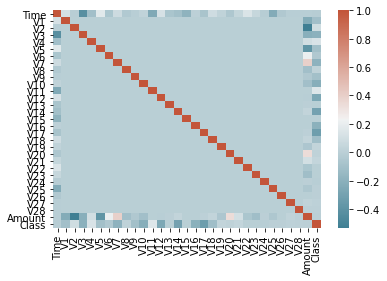

In [17]:
corr = dfst.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap=sns.diverging_palette(
    220, 20, as_cmap=True))

In [19]:
dfst.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:xlabel='Class'>

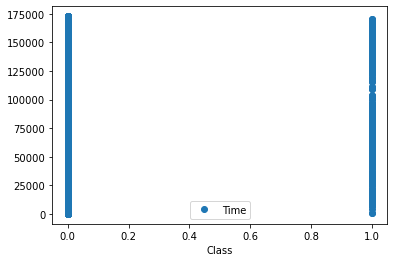

In [25]:
dfst.plot(x='Class', y='Time', style='o')

<AxesSubplot:xlabel='Class'>

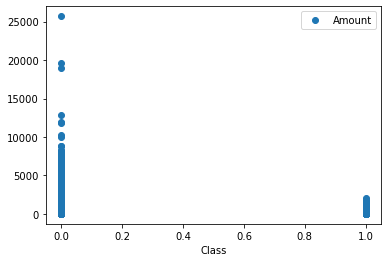

In [26]:
dfst.plot(x='Class', y='Amount', style='o')

<AxesSubplot:xlabel='Class'>

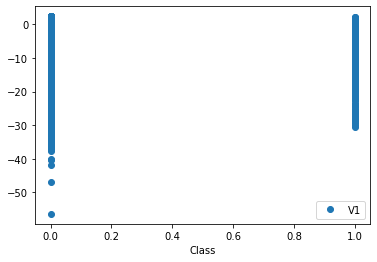

In [27]:
dfst.plot(x='Class', y='V1', style='o')

<AxesSubplot:xlabel='Class'>

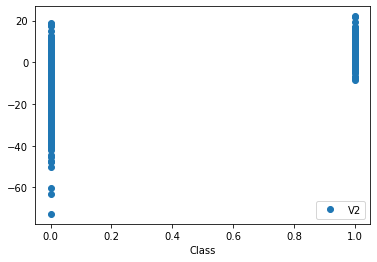

In [28]:
dfst.plot(x='Class', y='V2', style='o')

<AxesSubplot:xlabel='Class'>

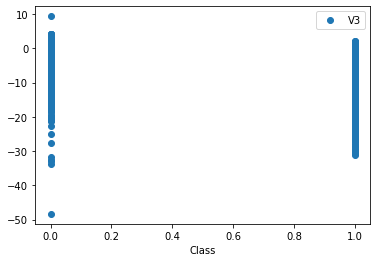

In [29]:
dfst.plot(x='Class', y='V3', style='o')

<AxesSubplot:xlabel='Class'>

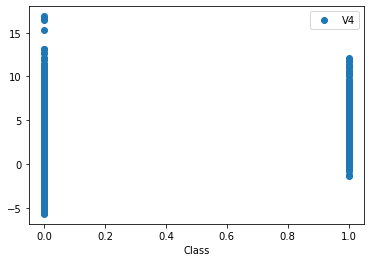

In [31]:
dfst.plot(x='Class', y='V4', style='o')

<AxesSubplot:xlabel='Class'>

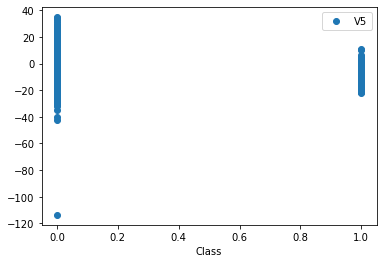

In [32]:
dfst.plot(x='Class', y='V5', style='o')

<AxesSubplot:xlabel='Class'>

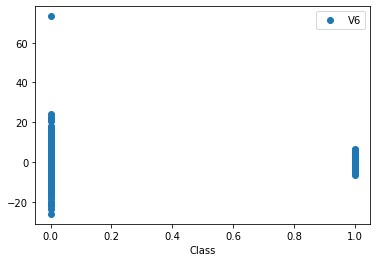

In [33]:
dfst.plot(x='Class', y='V6', style='o')

<AxesSubplot:xlabel='Class'>

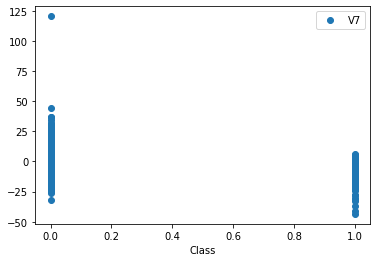

In [34]:
dfst.plot(x='Class', y='V7', style='o')

<AxesSubplot:xlabel='Class'>

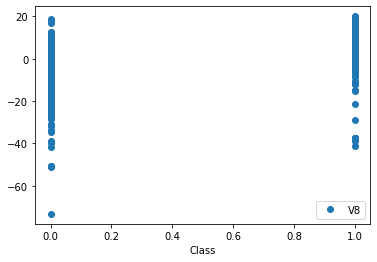

In [35]:
dfst.plot(x='Class', y='V8', style='o')

<AxesSubplot:xlabel='Class'>

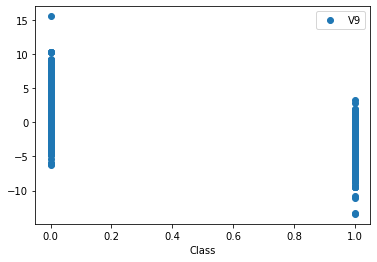

In [36]:
dfst.plot(x='Class', y='V9', style='o')

<AxesSubplot:xlabel='Class'>

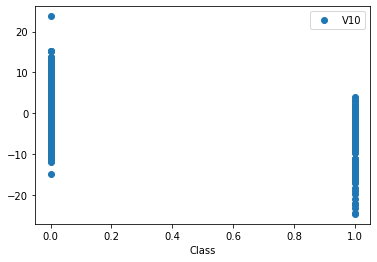

In [37]:
dfst.plot(x='Class', y='V10', style='o')

<AxesSubplot:xlabel='Class'>

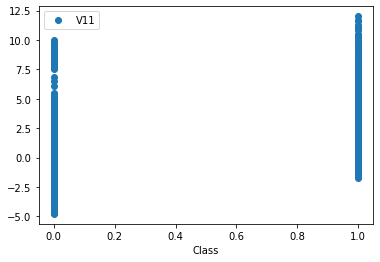

In [38]:
dfst.plot(x='Class', y='V11', style='o')

<AxesSubplot:xlabel='Class'>

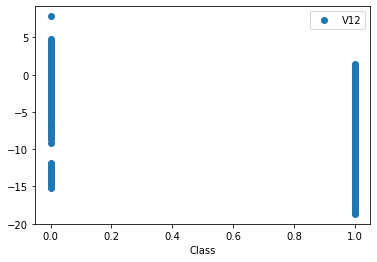

In [39]:
dfst.plot(x='Class', y='V12', style='o')

<AxesSubplot:xlabel='Class'>

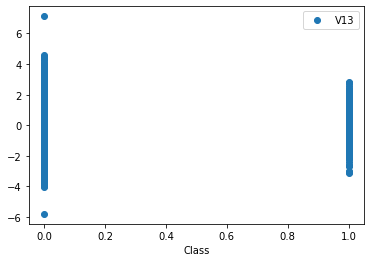

In [40]:
dfst.plot(x='Class', y='V13', style='o')

<AxesSubplot:xlabel='Class'>

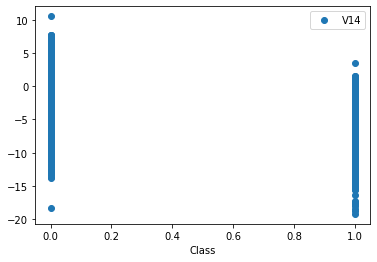

In [41]:
dfst.plot(x='Class', y='V14', style='o')

<AxesSubplot:xlabel='Class'>

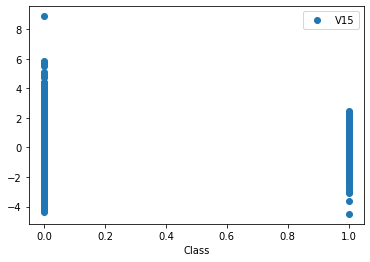

In [42]:
dfst.plot(x='Class', y='V15', style='o')

<AxesSubplot:xlabel='Class'>

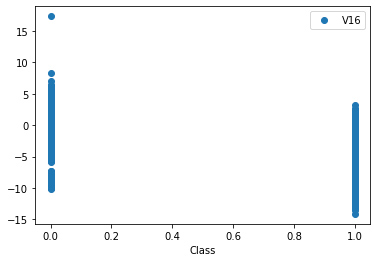

In [43]:
dfst.plot(x='Class', y='V16', style='o')

<AxesSubplot:xlabel='Class'>

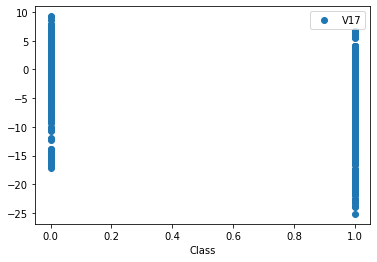

In [44]:
dfst.plot(x='Class', y='V17', style='o')

<AxesSubplot:xlabel='Class'>

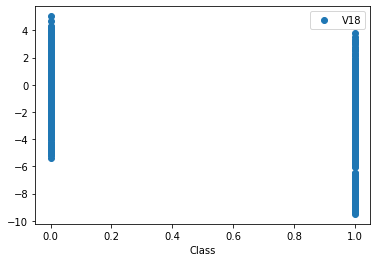

In [45]:
dfst.plot(x='Class', y='V18', style='o')

<AxesSubplot:xlabel='Class'>

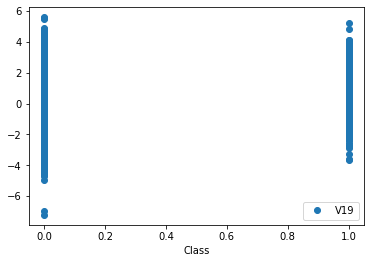

In [46]:
dfst.plot(x='Class', y='V19', style='o')

<AxesSubplot:xlabel='Class'>

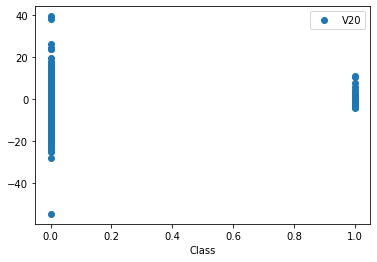

In [47]:
dfst.plot(x='Class', y='V20', style='o')

<AxesSubplot:xlabel='Class'>

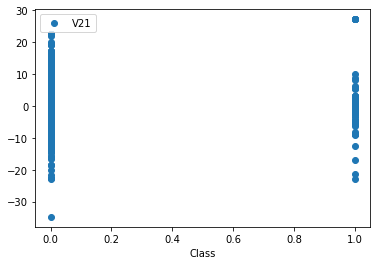

In [48]:
dfst.plot(x='Class', y='V21', style='o')

<AxesSubplot:xlabel='Class'>

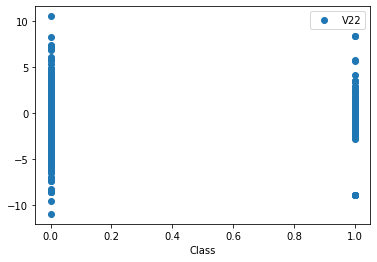

In [49]:
dfst.plot(x='Class', y='V22', style='o')

<AxesSubplot:xlabel='Class'>

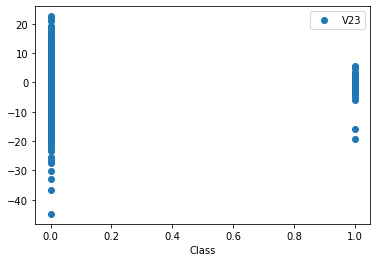

In [50]:
dfst.plot(x='Class', y='V23', style='o')

<AxesSubplot:xlabel='Class'>

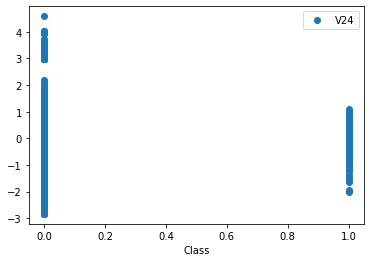

In [51]:
dfst.plot(x='Class', y='V24', style='o')

<AxesSubplot:xlabel='Class'>

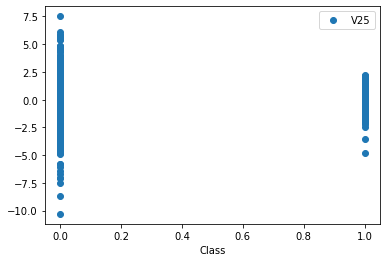

In [52]:
dfst.plot(x='Class', y='V25', style='o')

<AxesSubplot:xlabel='Class'>

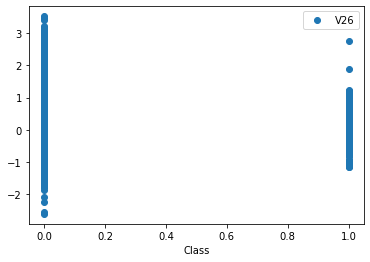

In [53]:
dfst.plot(x='Class', y='V26', style='o')

<AxesSubplot:xlabel='Class'>

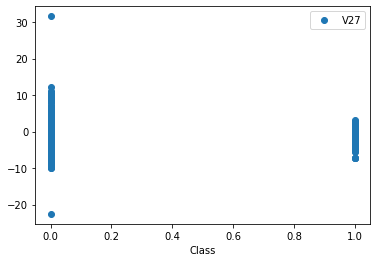

In [54]:
dfst.plot(x='Class', y='V27', style='o')

<AxesSubplot:xlabel='Class'>

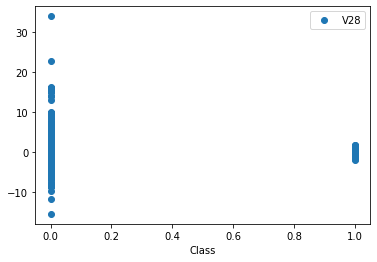

In [55]:
dfst.plot(x='Class', y='V28', style='o')